<h1>Statistics with Python</h1>

## Histogram and KDE 

Histogram and KDE for 1000 random integers from [0,8].

**Make sure to mention what the y-axis denotes.**

In Seaborn, you can choose it via the `stat` parameter. From Seaborn documentation, `stat` has the following options [ws:seaborn]

- count: number of observations in each bin
- frequency: number of observations divided by the bin width
- probability or proportion: normalize such that bar heights sum to 1
- percent: normalize such that bar heights sum to 100
- density: normalize such that the total area of the histogram equals 1

- See: [Seaborn histplot documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)


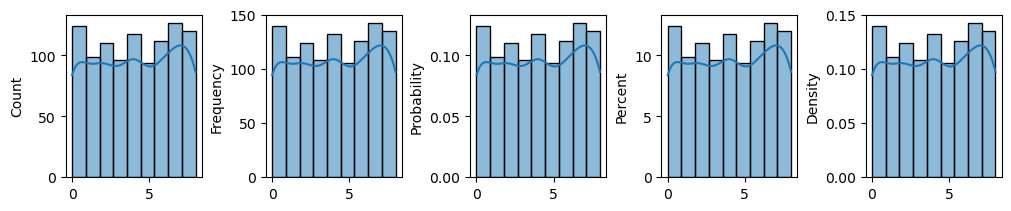

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 5, figsize=(10, 2), constrained_layout=True)
x = np.random.randint(0, 9, 1000)
properties = {"kde": True, "bins": 9}
sns.histplot(x, ax=ax[0], stat="count", **properties)
sns.histplot(x, ax=ax[1], stat="frequency", **properties)
sns.histplot(x, ax=ax[2], stat="probability", **properties)
sns.histplot(x, ax=ax[3], stat="percent", **properties)
sns.histplot(x, ax=ax[4], stat="density", **properties)
pass;

## Linear Regression in Python

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     354.1
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           7.79e-68
Time:                        14:19:30   Log-Likelihood:                -2342.7
No. Observations:                1000   AIC:                             4689.
Df Residuals:                     998   BIC:                             4699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5249      0.080     56.637      0.0

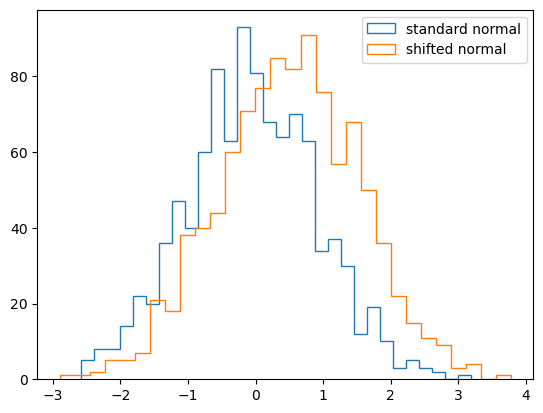

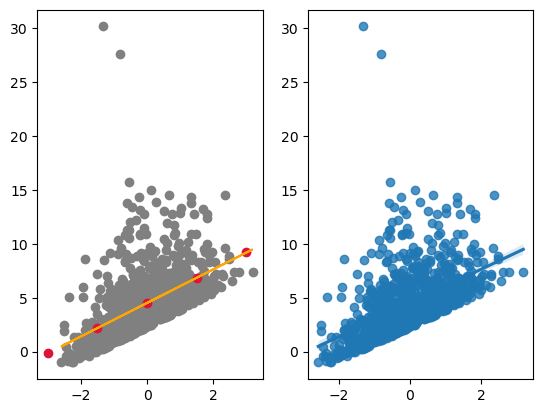

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# fix seed to get reproducible results
# scipy.stats uses np.random to generate its random numbers, so setting seed using numpy works. (ref: https://stackoverflow.com/questions/16016959/scipy-stats-seed)
np.random.seed(seed=23)
nobs = 1000  # number of observations
standard_normal = np.random.normal(loc=0.0, scale=1.0, size=nobs)
shifted_normal = np.random.normal(loc=0.5, scale=1.0, size=nobs)

plt.hist(standard_normal, bins=30, histtype="step", label="standard normal")
plt.hist(shifted_normal, bins=30, histtype="step", label="shifted normal")

plt.legend()

# a quick way to fit a linear regression model using statmodels
# ref: https://realpython.com/linear-regression-in-python/#advanced-linear-regression-with-statsmodels

# simple linear regression
# You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept. It doesn’t take the intercept into account by default.
x = standard_normal
X = sm.add_constant(standard_normal)
# print(x[:5], X[:5])

# create a y axis to test linear regression with an error term
y = 2.3 + 1.55 * x + 2.3 * np.random.exponential(size=nobs)

# be sure to provide X, not x
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

# you can get the predicted values using lin_reg.fittedvalues as used in the plot below. you can also use the model to predict y for new x values.
x_new = np.linspace(-3, 3, 5)
X_new = sm.add_constant(x_new)
y_new = lin_reg.predict(X_new)
# print(x_new,y_new)

fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y, c="gray")
ax[0].plot(x, lin_reg.fittedvalues, c="orange")
ax[0].scatter(x_new, y_new, c="crimson")
# seaborn automatically plots with confidence interval
sns.regplot(x=x, y=y, ax=ax[1])

# multiple linear regression
X = np.array(list(zip(standard_normal, shifted_normal)))
X
# You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept. It doesn’t take intercept into account by default.
X = sm.add_constant(X)
X
# create a y axis to test linear regression
y = (
    2.3
    + 1.55 * standard_normal
    + 2.4 * shifted_normal
    + 5 * np.sin(np.random.random(size=nobs))
)
lin_reg = sm.OLS(y, X).fit()
lin_reg.summary()

# get statistical properties using scipy stats module
stats.describe(standard_normal)
stats.describe(shifted_normal)

# checking if the distributions are normal (we know they are)
stats.normaltest(standard_normal)
stats.normaltest(shifted_normal)

# KS-test

stats.kstest(standard_normal, stats.norm.cdf)
stats.kstest(shifted_normal, stats.norm.cdf)

# two-tailed test
# finds if the given random numbers are from same distribution

stats.ttest_ind(standard_normal, shifted_normal)

pass;